In [2]:
import pandas as pd

# Load the dataset
file_path = '[BADSS case] Advertiser Sign-ups 2023-2024 - data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,Advertiser_ID,Country,Sign_Up_Date,Projected_Annual_Budget
0,A000001,USA,2023-01-01,84376
1,A000002,USA,2023-01-01,57297
2,A000003,USA,2023-01-01,34081
3,A000004,USA,2023-01-01,154506
4,A000005,USA,2023-01-01,23604


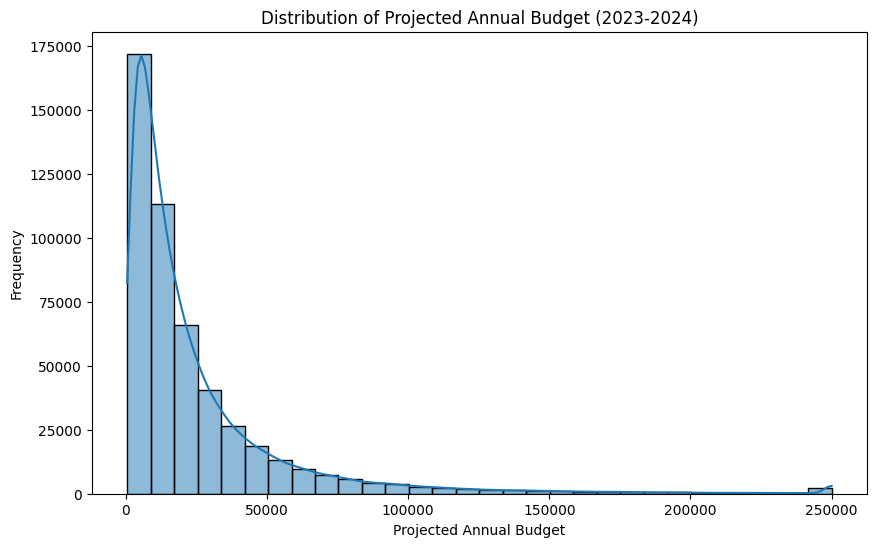

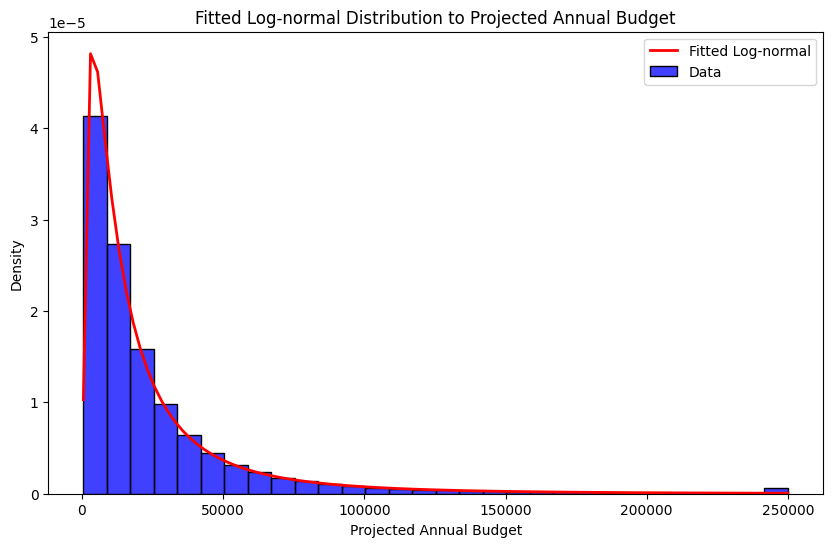

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, lognorm

# Analyze the projected annual budget distribution
plt.figure(figsize=(10, 6))

# Plot the distribution of projected annual budget for all countries combined
sns.histplot(df['Projected_Annual_Budget'], kde=True, bins=30)
plt.title("Distribution of Projected Annual Budget (2023-2024)")
plt.xlabel("Projected Annual Budget")
plt.ylabel("Frequency")
plt.show()

# Fit a log-normal distribution to the budget data and visualize
shape, loc, scale = lognorm.fit(df['Projected_Annual_Budget'], floc=0)
x = np.linspace(df['Projected_Annual_Budget'].min(), df['Projected_Annual_Budget'].max(), 100)
pdf_fitted = lognorm.pdf(x, shape, loc, scale)

# Plot the fitted log-normal distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Projected_Annual_Budget'], kde=False, bins=30, stat='density', label='Data', color='blue')
plt.plot(x, pdf_fitted, label="Fitted Log-normal", color='red', linewidth=2)
plt.title("Fitted Log-normal Distribution to Projected Annual Budget")
plt.xlabel("Projected Annual Budget")
plt.ylabel("Density")
plt.legend()
plt.show()

In [6]:
import pandas as pd
import numpy as np

# Convert Sign_Up_Date to datetime
df['Sign_Up_Date'] = pd.to_datetime(df['Sign_Up_Date'])

# Define the number of Monte Carlo simulations
num_simulations = 1

# Create a dictionary to store log-normal parameters for each country
log_normal_params = {}

# Calculate the log-transformed budgets and log-normal parameters for each country
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]

    # Filter out non-positive values to avoid errors in log transformation
    positive_budgets = country_data['Projected_Annual_Budget'][country_data['Projected_Annual_Budget'] > 0]

    # Calculate the log-transformed budgets for the current country
    log_budgets = np.log(positive_budgets)

    # Calculate the mean and standard deviation of the log-transformed budgets for the current country
    log_mean = log_budgets.mean()
    log_std = log_budgets.std()

    # Print out the log-mean for each country
    print(f"Country: {country}, log_mean: {log_mean}, log_std:{log_std}")

    # Store the parameters for each country
    log_normal_params[country] = {'log_mean': log_mean, 'log_std': log_std}

# Create an empty list to store simulation results
simulated_data = []

# Initialize a global counter for unique customer IDs
customer_id_counter = 1

# Loop through each country to simulate arrivals and budgets
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]

    # Calculate the daily sign-ups per country
    country_daily_signups = country_data.groupby(country_data['Sign_Up_Date'].dt.date).size()

    # Get the log-normal parameters for the current country
    log_mean = log_normal_params[country]['log_mean']
    log_std = log_normal_params[country]['log_std']

    # Loop over the number of simulations
    for simulation in range(num_simulations):
        arrivals = []
        for day, rate in country_daily_signups.items():
            # Simulate the number of arrivals for each day in 2025 based on historical rate
            num_arrivals = np.random.poisson(rate)
            arrivals.extend([day] * num_arrivals)  # Extend the list with the same day for each arrival

        # Simulate budgets using the log-normal distribution for the current country
        simulated_budgets = np.random.lognormal(mean=log_mean, sigma=log_std, size=len(arrivals))

        # Ensure no extreme values (clip values to avoid 0 or negative)
        simulated_budgets = np.clip(simulated_budgets, a_min=1e-6, a_max=None)  # Clip values to avoid 0 or negative

        # Append simulation results to the list with unique customer IDs
        for arrival_day, budget in zip(arrivals, simulated_budgets):
            simulated_data.append({
                'Country': country,
                'Sign_Up_Date': pd.to_datetime(arrival_day),  # Use the exact simulated day
                'Projected_Annual_Budget': budget,
                'Advertiser_ID': customer_id_counter  # Unique customer ID
            })
            customer_id_counter += 1  # Increment the global customer ID counter

# Convert simulated data to DataFrame
simulated_df = pd.DataFrame(simulated_data)

# Save to a CSV file
simulated_df.to_csv('simulated_advertiser_signups_2025_daily_with_ID.csv', index=False)

print("Simulation complete! The results are saved in 'simulated_advertiser_signups_2025_daily_with_ID.csv'.")


Country: USA, log_mean: 10.297843888012908, log_std:0.9894640973430353
Country: UK, log_mean: 9.791815735305931, log_std:1.0021289080496993
Country: Germany, log_mean: 9.709790844794735, log_std:0.9898574870011358
Country: India, log_mean: 9.951451443369972, log_std:0.9949761679891667
Country: Brazil, log_mean: 9.795986257049272, log_std:0.986964408918429
Country: Japan, log_mean: 9.606677547765074, log_std:0.9953193468915127
Country: Australia, log_mean: 9.392067902109929, log_std:1.0004446085729417
Country: Canada, log_mean: 9.51397943525431, log_std:1.0054792745652048
Country: France, log_mean: 9.503940719304346, log_std:1.005156084329211
Country: Mexico, log_mean: 9.101763603880084, log_std:1.0086516748130383
Country: China, log_mean: 9.876888147814357, log_std:0.9946159952364699
Country: Italy, log_mean: 9.27470008000568, log_std:1.0015107203220992
Country: Spain, log_mean: 8.930706742079428, log_std:1.0027456833726012
Country: Poland, log_mean: 8.706993631436154, log_std:0.987505

In [3]:
import pandas as pd
import numpy as np


# Convert Sign_Up_Date to datetime
df['Sign_Up_Date'] = pd.to_datetime(df['Sign_Up_Date'])

# Define the number of Monte Carlo simulations
num_simulations = 1

# Create a dictionary to store log-normal parameters for each country
log_normal_params = {}

# Calculate the log-transformed budgets and log-normal parameters for each country
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]

    # Filter out non-positive values to avoid errors in log transformation
    positive_budgets = country_data['Projected_Annual_Budget'][country_data['Projected_Annual_Budget'] > 0]

    # Calculate the log-transformed budgets for the current country
    log_budgets = np.log(positive_budgets)

    # Calculate the mean and standard deviation of the log-transformed budgets for the current country
    log_mean = log_budgets.mean()
    log_std = log_budgets.std()

    # Print out the log-mean for each country
    print(f"Country: {country}, log_mean: {log_mean}")

    # Store the parameters for each country
    log_normal_params[country] = {'log_mean': log_mean, 'log_std': log_std}

# Function to simulate extreme cases
def simulate_extreme_case(country_daily_signups, country, log_mean, log_std, extreme_type):
    simulated_data = []
    customer_id_counter = 1

    if extreme_type == 'drop':
        # Drop for 1-2 months (due to product launch issues)
        drop_months = ['2025-03-01', '2025-04-01']  # Example: March and April 2025
        for month in drop_months:
            if month in country_daily_signups.index:
                country_daily_signups[month] = country_daily_signups[month] * 0.3  # Drop by 70%

    elif extreme_type == 'q4_surge':
        # Q4 surge (due to marketing strategy)
        q4_months = ['2025-10-01', '2025-11-01', '2025-12-01']  # Example: Q4 2025
        for month in q4_months:
            if month in country_daily_signups.index:
                country_daily_signups[month] = country_daily_signups[month] * 2  # Double the sign-ups

    elif extreme_type == 'market_recovery':
        # Market recovery (50% increase)
        for month in country_daily_signups.index:
            country_daily_signups[month] = country_daily_signups[month] * 1.5  # 50% increase

    # Simulate for each day using the modified rates
    for day, rate in country_daily_signups.items():
        num_arrivals = np.random.poisson(rate)
        arrivals = [day] * num_arrivals

        # Simulate budgets using the log-normal distribution for the current country
        simulated_budgets = np.random.lognormal(mean=log_mean, sigma=log_std, size=len(arrivals))

        # Ensure no extreme values (clip values to avoid 0 or negative)
        simulated_budgets = np.clip(simulated_budgets, a_min=1e-6, a_max=None)  # Clip values to avoid 0 or negative

        # Append simulation results to the list with unique customer IDs
        for arrival_day, budget in zip(arrivals, simulated_budgets):
            simulated_data.append({
                'Country': country,
                'Sign_Up_Date': pd.to_datetime(arrival_day),  # Use the exact simulated day
                'Projected_Annual_Budget': budget,
                'Advertiser_ID': customer_id_counter  # Unique customer ID
            })
            customer_id_counter += 1  # Increment the global customer ID counter

    return simulated_data

# Loop through each country to simulate arrivals and budgets for each extreme case
for extreme_type in ['drop', 'q4_surge', 'market_recovery']:
    all_simulated_data = []

    for country in df['Country'].unique():
        country_data = df[df['Country'] == country]

        # Calculate the daily sign-ups per country
        country_daily_signups = country_data.groupby(country_data['Sign_Up_Date'].dt.date).size()

        # Get the log-normal parameters for the current country
        log_mean = log_normal_params[country]['log_mean']
        log_std = log_normal_params[country]['log_std']

        # Simulate for the current extreme case
        simulated_data = simulate_extreme_case(country_daily_signups, country, log_mean, log_std, extreme_type)
        all_simulated_data.extend(simulated_data)

    # Convert simulated data to DataFrame
    simulated_df = pd.DataFrame(all_simulated_data)

    # Save to a CSV file for each extreme case
    file_name = f"simulated_advertiser_signups_2025_{extreme_type}.csv"
    simulated_df.to_csv(file_name, index=False)

    print(f"Simulation for '{extreme_type}' complete! The results are saved in '{file_name}'.")


Country: USA, log_mean: 10.297843888012908
Country: UK, log_mean: 9.791815735305931
Country: Germany, log_mean: 9.709790844794735
Country: India, log_mean: 9.951451443369972
Country: Brazil, log_mean: 9.795986257049272
Country: Japan, log_mean: 9.606677547765074
Country: Australia, log_mean: 9.392067902109929
Country: Canada, log_mean: 9.51397943525431
Country: France, log_mean: 9.503940719304346
Country: Mexico, log_mean: 9.101763603880084
Country: China, log_mean: 9.876888147814357
Country: Italy, log_mean: 9.27470008000568
Country: Spain, log_mean: 8.930706742079428
Country: Poland, log_mean: 8.706993631436154
Country: South Korea, log_mean: 9.10140780808075
Country: South Africa, log_mean: 8.407994651465287
Country: Vietnam, log_mean: 8.912326087826383
Country: Argentina, log_mean: 8.02243310970156
Country: Turkey, log_mean: 8.420179099891477
Country: Indonesia, log_mean: 8.700687232205429
Country: Thailand, log_mean: 8.036511131289313
Country: UAE, log_mean: 7.394074607296961
Simu

<ipython-input-3-813468b50ae7>:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '157.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  country_daily_signups[month] = country_daily_signups[month] * 1.5  # 50% increase
<ipython-input-3-813468b50ae7>:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  country_daily_signups[month] = country_daily_signups[month] * 1.5  # 50% increase
<ipython-input-3-813468b50ae7>:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '88.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  country_daily_signups[month] = country_daily_signups[mont

Simulation for 'market_recovery' complete! The results are saved in 'simulated_advertiser_signups_2025_market_recovery.csv'.
